# Scifi Movies Available on Streaming Services Analysis

## Project Purpose
This is my capstone project.  The purpose is to determine the availability of science fiction movies on various streaming services. The analysis is performed using Python and Jupyter Notebooks, leveraging libraries such as pandas, kagglehub, and matplotlib.

## Analysis Goals
- Find the highest rated movies available.
- Find the lowest rated movies available.
- Determine which streaming service has the best value for the genre of Sci-fi.
- Compare the Relationships between the Quality of movies and their box office returns.




## Importing modules

In [6]:
# This section of code is for importing the necessary libraries.

import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## 1. Loading data. 

Read TWO data files (JSON, CSV, Excel, etc.). 

In [7]:
# This section of code downloads the datasets from kaggle.

path_1 = kagglehub.dataset_download("rajugc/imdb-movies-dataset-based-on-genre")
path_2 = kagglehub.dataset_download("ruchi798/movies-on-netflix-prime-video-hulu-and-disney")
scifi_dataset = pd.read_csv(f"{path_1}/scifi.csv")
stream_dataset = pd.read_csv(f"{path_2}/MoviesOnStreamingPlatforms.csv")

# 2. Clean and operate on the data while combining them. 

Cleaning Movie Data.

In [4]:
# This section of code is for cleaning the scifi dataset.

scifi_dataset = scifi_dataset.drop(
    ['movie_id','year', 'certificate', 'runtime', 'genre', 'director_id', 'star_id','votes'], axis='columns'
)
# This line of code converts the rating column to a float and multiplies it by 10 so that it is on the same scale as my other dataset.
scifi_dataset['rating'] = scifi_dataset['rating'].apply(
    lambda x: str(float(x) * 10))
scifi_dataset['gross(in $)'] = scifi_dataset['gross(in $)'] / 1_000_000
scifi_dataset['rating'] = scifi_dataset['rating'].astype(float)
scifi_dataset.columns = (
    scifi_dataset.columns
    .str.upper()
    .str.strip()
    .str.replace('_',' ')
)

In [ ]:
# This section of code displays the first 5 rows of the cleaned scifi dataset.
scifi_dataset.head(5)

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204965.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295177.0,NaN
2,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327912.0,NaN
3,tt8760708,M3GAN,2022,PG-13,102 min,"Horror, Sci-Fi, Thriller",6.4,A robotics engineer at a toy company builds a ...,Gerard Johnstone,/name/nm2067421/,"Allison Williams, \nViolet McGraw, \nRonny Chi...","/name/nm4129745/,/name/nm8627157/,/name/nm5307...",62493.0,NaN
4,tt10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125 min,"Action, Adventure, Comedy",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,/name/nm0715636/,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5707.0,NaN


Cleaning Stream Data.

In [5]:
# This section of code is for cleaning the stream dataset.
stream_dataset.columns = (
    stream_dataset.columns
    .str.upper()
    .str.strip()
    .str.replace('_',' ')
)
stream_dataset['ROTTEN TOMATOES'] = stream_dataset['ROTTEN TOMATOES'].astype(str)
# This line of code is to format the rotten tomatoes column so that it is on the same scale as my other dataset.
stream_dataset['ROTTEN TOMATOES'] = stream_dataset['ROTTEN TOMATOES'].apply(
    lambda x: (float(x.split('/')[0]) / float(x.split('/')[1]) * 100) if '/' in x else None)
stream_dataset = stream_dataset.drop(
    ['UNNAMED: 0', 'ID', 'YEAR', 'AGE', 'TYPE'], axis ='columns')

stream_dataset[['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']] = stream_dataset[['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']].astype(bool)
stream_dataset = stream_dataset.rename(columns={'TITLE': 'MOVIE NAME'})
stream_dataset = stream_dataset.dropna()
stream_dataset.columns = stream_dataset.columns.str.strip().str.upper()

In [9]:
# This section of code displays the first 5 rows of the cleaned stream dataset.
stream_dataset.head(5)

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


Data Merged.

In [6]:
# Merge the two datasets.
merged_data = pd.merge(scifi_dataset, stream_dataset, on='MOVIE NAME', how='inner')

In [7]:
# Checking the first 5 rows of the merged dataset.
merged_data.head(5)

,MOVIE NAME,RATING,DESCRIPTION,DIRECTOR,STAR,GROSS(IN $),ROTTEN TOMATOES,NETFLIX,HULU,PRIME VIDEO,DISNEY+
0,Black Panther,73.0,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...",700.059566,84.0,False,False,False,True
1,Avatar,79.0,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We...",760.507625,86.0,False,False,False,True
2,Avengers: Endgame,84.0,After the devastating events of Avengers: Infi...,"Anthony Russo, \nJoe Russo","Robert Downey Jr., \nChris Evans, \nMark Ruffa...",858.373000,90.0,False,False,False,True
3,Ant-Man,73.0,Armed with a super-suit with the astonishing a...,Peyton Reed,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...",180.202163,84.0,False,False,False,True
4,About Time,78.0,"At the age of 21, Tim discovers he can travel ...",Richard Curtis,"Domhnall Gleeson, \nRachel McAdams, \nBill Nig...",15.322921,83.0,True,False,False,False


In [8]:
cleaned_data = merged_data.dropna()

Feature Engineering

In [9]:
# Feature Engineering
# I was getting an error here (SettingWithCopyWarning) and I could not solve it. I used AI to solve issue and it suggested the code modification of .copy()
# Original Code --- cleaned_data.loc[:,'AVERAGE RATING'] = (cleaned_data['RATING'] + cleaned_data['ROTTEN TOMATOES']) / 2
# Revised Code---
cleaned_data = cleaned_data.copy()
cleaned_data.loc[:, 'AVERAGE RATING'] = (cleaned_data['RATING'] + cleaned_data['ROTTEN TOMATOES']) / 2
cleaned_data = cleaned_data.dropna()

In [10]:
# Statistical Analysis
print(cleaned_data.describe())

           RATING  GROSS(IN $)  ROTTEN TOMATOES  AVERAGE RATING
count  246.000000   246.000000       246.000000       246.00000
mean    63.512195    80.185947        70.052846        66.78252
std     10.740247   136.713777        10.736988         9.73236
min     24.000000     0.004288        34.000000        32.00000
25%     57.000000     3.683763        64.000000        61.00000
50%     64.000000    29.172514        71.500000        67.00000
75%     71.000000    83.876801        78.000000        73.50000
max     86.000000   858.373000        90.000000        87.50000


# 3. Visualize / Present your data. 

The following chart is a visualization of top rated Scifi Movies available on streaming services. 

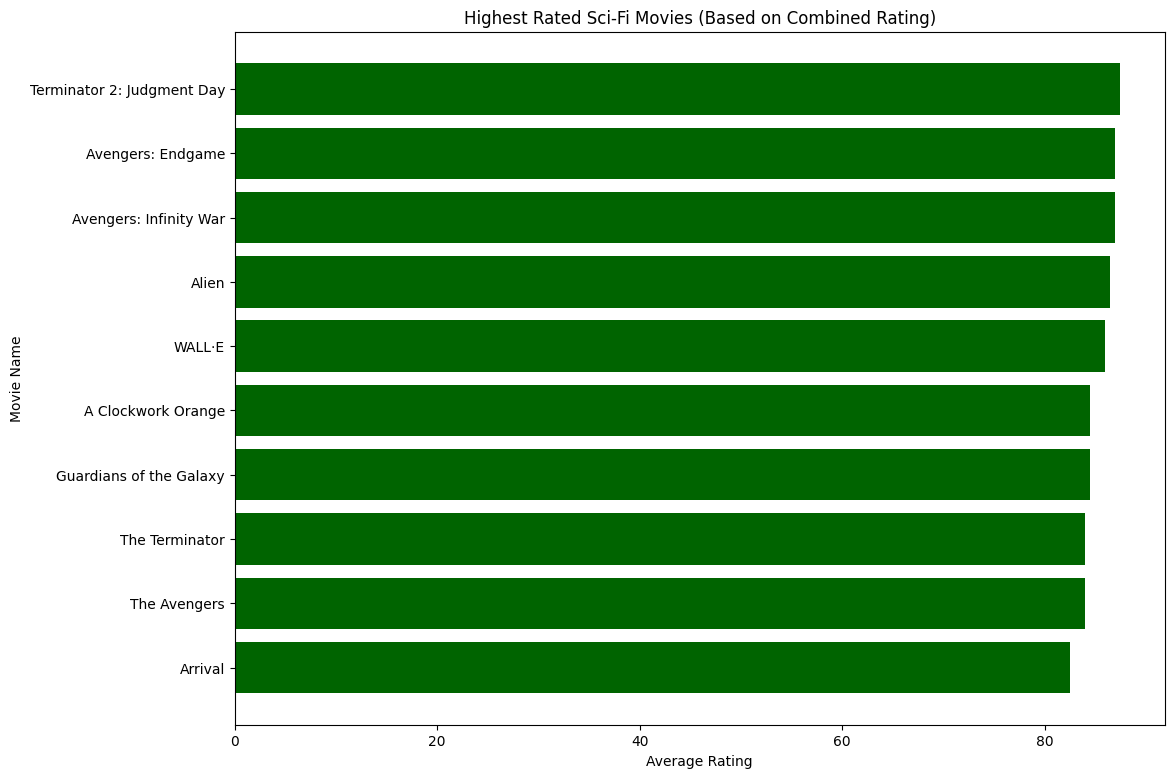

In [16]:
# Hightest rated movies
cleaned_data_sorted = cleaned_data.sort_values(by='AVERAGE RATING', ascending=False)
top_10_df = cleaned_data_sorted.head(10)
bottom_10_df = cleaned_data_sorted.tail(10)

plt.figure(figsize=(12, 9))
plt.barh(top_10_df['MOVIE NAME'], top_10_df['AVERAGE RATING'], color='darkgreen')
plt.xlabel('Average Rating')
plt.ylabel('Movie Name')
plt.title('Highest Rated Sci-Fi Movies (Based on Combined Rating)')
plt.gca().invert_yaxis()
plt.show()

The following chart is a visualization of the bottom rated Scifi Movies available on streaming services. 

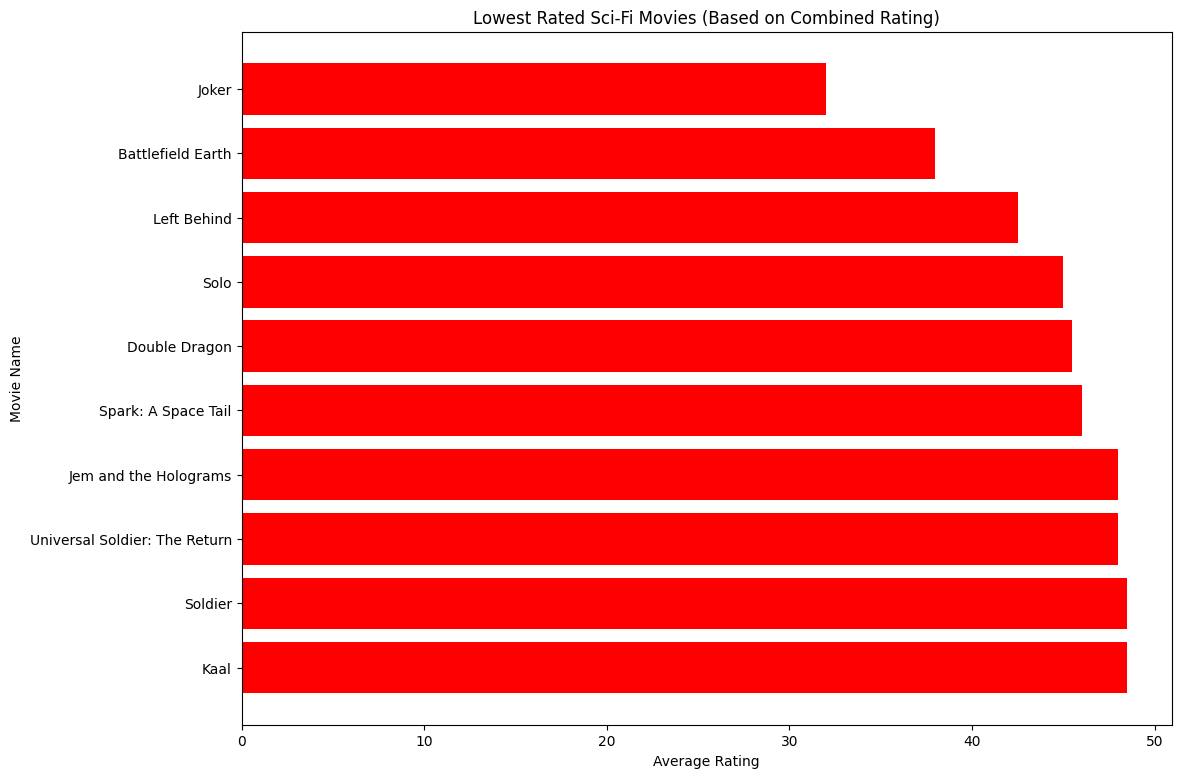

In [18]:
# Lowest Rated Movies
plt.figure(figsize=(12, 9))
plt.barh(bottom_10_df['MOVIE NAME'], bottom_10_df['AVERAGE RATING'], color='red')
plt.xlabel('Average Rating')
plt.ylabel('Movie Name')
plt.title('Lowest Rated Sci-Fi Movies (Based on Combined Rating)')
plt.show()

The following chart is a visualization of the Volume of movies avaialble on each Platform.

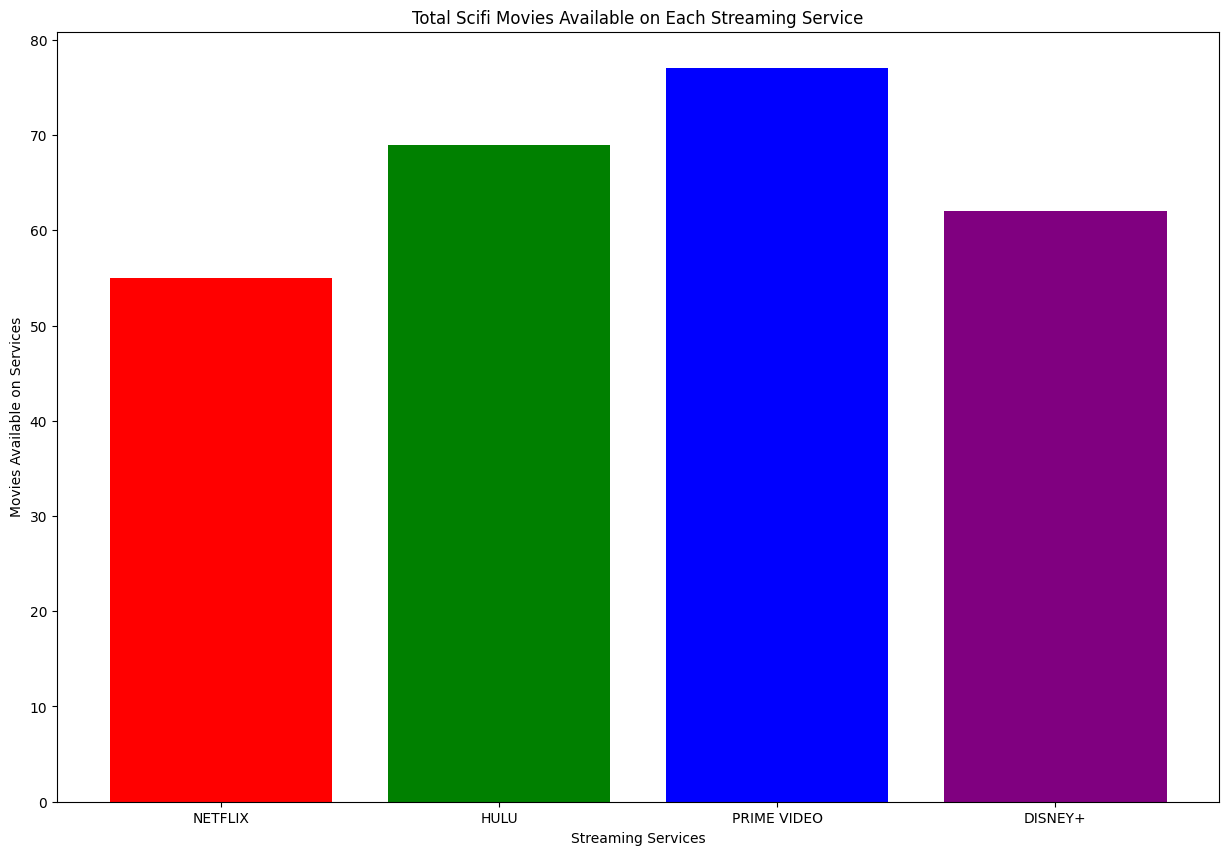

In [19]:
# Count the number of movies available on each streaming service
services = ['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']
counts = {service: cleaned_data[service].sum() for service in services}
counts_df = pd.DataFrame(list(counts.items()), columns=['Streaming Service', 'Movies Available'])

plt.figure(figsize=(15, 10))
plt.bar(counts_df['Streaming Service'], counts_df['Movies Available'], color=['red', 'green', 'blue', 'purple'])
plt.xlabel('Streaming Services')
plt.ylabel('Movies Available on Services')
plt.title('Total Scifi Movies Available on Each Streaming Service')
plt.show()

The following chart is a visualization of the relationship between the rating of a movies and their box office revenue. 

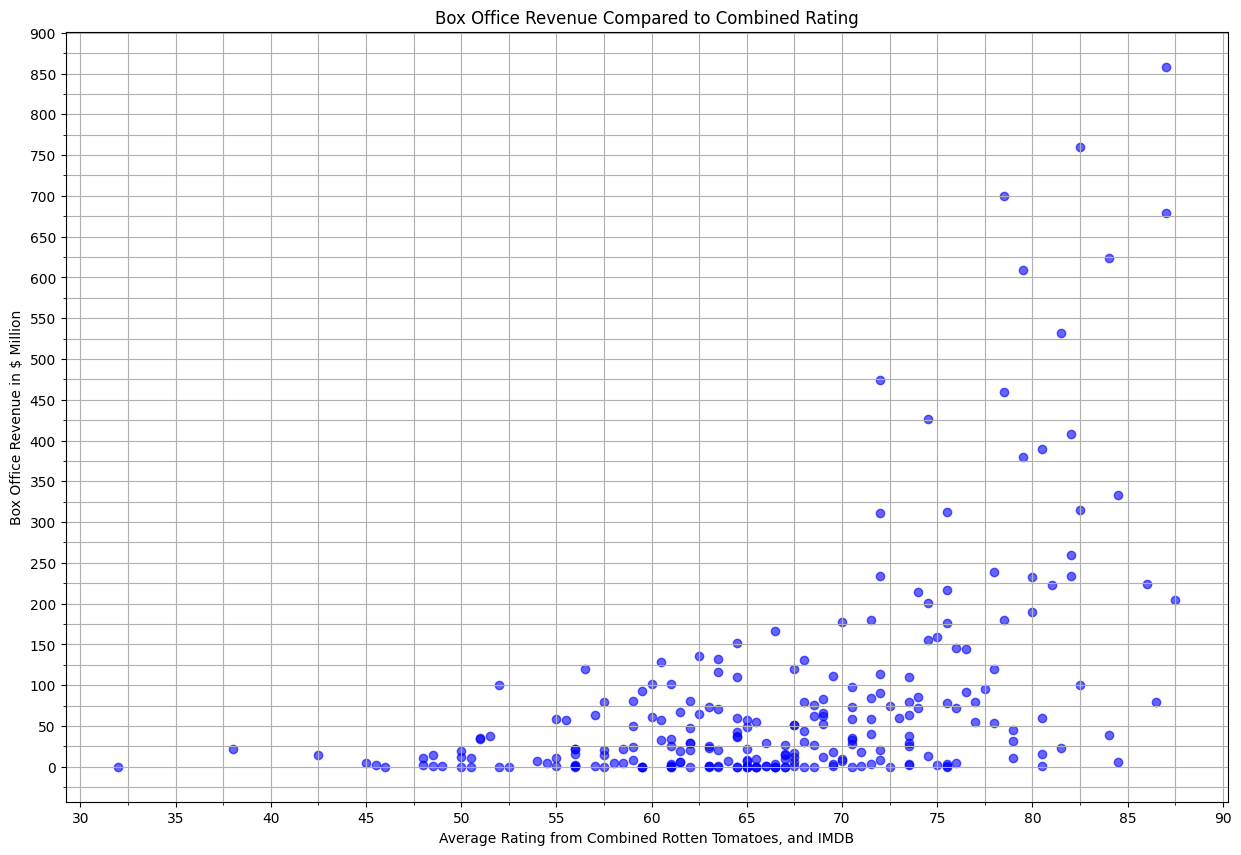

In [20]:
# Box Office Scatter Chart
plt.figure(figsize=(15, 10))
plt.scatter(cleaned_data['AVERAGE RATING'], cleaned_data['GROSS(IN $)'], color='blue', alpha=0.6)
plt.xlabel('Average Rating from Combined Rotten Tomatoes, and IMDB')
plt.ylabel('Box Office Revenue in $ Million')
plt.title('Box Office Revenue Compared to Combined Rating')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(25))

plt.grid(True, which='both')
plt.show()

# 4. Best Practices

### Follow These Steps To use a Virtual Environment.
- Activate virtual enviroment
- \venv\Scripts\activate
- to deactivate
- deactivate

# 5. Conclusions
After completing this analysis, I feel that I accomplished my goals.
* I was able to determine the top and bottom rated movies.
* Based on this data and personal experience, I agree that Amazon Prime is the best source for Sci-Fi movies.
* Comparing Ratings and Box Office Revenue, they appear to be directly proportional, my hypothesis is that people may watch high quality movies more than once, or that the high quality movies are a franchise that is highly anticipated before release.

Future analysis should be performed to determine the following:
* Are some movies available on more that one streaming service?
* Could I determine the average Quality of the movies on each service?
* Could I find data that returns the cost per movie to compare with ratings and box office revenue? 
